# Import Required Libraries
Import the necessary libraries, including pandas.

In [2]:
# Import Required Libraries
# Here we are importing the necessary libraries for our task

import pandas as pd # pandas is a software library written for the Python programming language for data manipulation and analysis.

# Load the Dataset
Use pandas to load the 'tested_worldwide.csv' file from the root level.

In [3]:
# Load the Dataset
# Here we are using pandas to load the 'tested_worldwide.csv' file from the root level.

# Load the dataset
data = pd.read_csv('tested_worldwide.csv')

# Display the first 5 rows of the dataset
data.head()

,Date,Country_Region,Province_State,positive,active,hospitalized,hospitalizedCurr,recovered,death,total_tested,daily_tested,daily_positive
0,2020-01-16,Iceland,All States,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-17,Iceland,All States,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2020-01-18,Iceland,All States,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,2020-01-20,South Korea,All States,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
4,2020-01-22,United States,All States,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


# Display the First 5 Rows
Use the head() function to display the first 5 rows of the dataset.

In [4]:
# Display the First 5 Rows
# Here we are using the head() function to display the first 5 rows of the dataset

# Display the first 5 rows of the dataset
data.head()

,Date,Country_Region,Province_State,positive,active,hospitalized,hospitalizedCurr,recovered,death,total_tested,daily_tested,daily_positive
0,2020-01-16,Iceland,All States,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-17,Iceland,All States,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2020-01-18,Iceland,All States,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,2020-01-20,South Korea,All States,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
4,2020-01-22,United States,All States,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


Display the number of rows and columns in the dataframe

In [5]:
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 27641
Number of columns: 12


Display the data types of each column

In [5]:
data.dtypes


Date                 object
Country_Region       object
Province_State       object
positive            float64
active              float64
hospitalized        float64
hospitalizedCurr    float64
recovered           float64
death               float64
total_tested        float64
daily_tested        float64
daily_positive      float64
dtype: object

Display the number of missing values in each column

In [6]:
missing_values = data.isnull().sum()
print(missing_values)


Date                    0
Country_Region          0
Province_State          0
positive             4242
active               9833
hospitalized        19231
hospitalizedCurr    13080
recovered            9626
death                4010
total_tested          912
daily_tested         1174
daily_positive       4557
dtype: int64


Display the number of unique values in each column

In [7]:
unique_values = data.nunique()
print(unique_values)


Date                  297
Country_Region        147
Province_State         81
positive            14998
active               9554
hospitalized         4862
hospitalizedCurr     2904
recovered            9183
death                5641
total_tested        23610
daily_tested        13375
daily_positive       3440
dtype: int64


Drop the columns that are not needed for the analysis

In [8]:
data = data[['Country_Region', 'positive', 'total_tested']]


Rename the columns to make them more readable

In [9]:
data.rename(columns={'Country_Region': 'Country', 'positive': 'Positive Cases', 'total_tested': 'Total Tested'}, inplace=True)


Drop the rows that have missing values

In [10]:
data.dropna(inplace=True)


Convert the data types of the columns to the appropriate types

In [11]:
data['Positive Cases'] = data['Positive Cases'].astype(int)
data['Total Tested'] = data['Total Tested'].astype(int)
data['Country'] = data['Country'].astype(str)

Display the number of missing values in each column

In [12]:
missing_values = data.isnull().sum()
print(missing_values)


Country           0
Positive Cases    0
Total Tested      0
dtype: int64


Create a new dataframe that contains the total number of positive cases for each country

In [13]:
# Group the data by 'Country' and calculate the sum of 'Positive Cases'
total_positive_cases = data.groupby('Country')['Positive Cases'].sum()

# Create a new dataframe with the total positive cases for each country
df_total_positive_cases = pd.DataFrame({'Country': total_positive_cases.index, 'Total Positive Cases': total_positive_cases.values})

# Display the new dataframe
df_total_positive_cases


,Country,Total Positive Cases
0,Albania,12279
1,Argentina,28220
2,Armenia,7225809
3,Australia,20654
4,Austria,541013
...,...,...
112,United States,1837768204
113,Uruguay,2160
114,Veneto,119910
115,Venezuela,461


Sort the dataframe in descending order of the total number of positive cases

In [14]:
df_total_positive_cases.sort_values(by='Total Positive Cases', ascending=False, inplace=True)


Display the top ten countries with the most positive cases

In [15]:
df_total_positive_cases.head(10)


,Country,Total Positive Cases
112,United States,1837768204
48,Italy,64199206
17,Canada,50960416
7,Bangladesh,43771939
106,Turkey,16556127
26,Czechia,10822251
88,Russia,10663267
2,Armenia,7225809
21,Costa Rica,6655702
111,United Kingdom,4924956


Create a new dataframe that contains the total number of tests conducted for each country

In [16]:
# Group the data by 'Country' and calculate the sum of 'Total Tested'
total_tests = data.groupby('Country')['Total Tested'].sum()

# Create a new dataframe with the total tests conducted for each country
df_total_tests = pd.DataFrame({'Country': total_tests.index, 'Total Tests': total_tests.values})

# Display the new dataframe
df_total_tests


,Country,Total Tests
0,Albania,114611
1,Argentina,323035
2,Armenia,35667650
3,Australia,323233309
4,Austria,7610548
...,...,...
112,United States,23592177772
113,Uruguay,51789
114,Veneto,1650118
115,Venezuela,395904


Sort the dataframe in descending order of the total number of tests conducted

In [17]:
df_total_tests.sort_values(by='Total Tests', ascending=False, inplace=True)


Display the top ten countries with the most tests conducted

In [18]:
df_total_tests.head(10)


,Country,Total Tests
112,United States,23592177772
17,Canada,1797986542
48,Italy,1547472209
47,Israel,388197039
3,Australia,323233309
88,Russia,300300499
7,Bangladesh,233149800
106,Turkey,228325949
26,Czechia,180065598
39,Greece,142101237


Merge the two dataframes created in the previous steps

In [19]:
merged_df = pd.merge(df_total_positive_cases, df_total_tests, on='Country')
merged_df


,Country,Total Positive Cases,Total Tests
0,United States,1837768204,23592177772
1,Italy,64199206,1547472209
2,Canada,50960416,1797986542
3,Bangladesh,43771939,233149800
4,Turkey,16556127,228325949
...,...,...,...
112,Mozambique,160,5287
113,Myanmar,151,8460
114,Malawi,78,1689
115,Grenada,42,322


Create a new column that contains the ratio of positive cases to the number of tests conducted

In [20]:
merged_df['Positive Cases to Tests Ratio'] = merged_df['Total Positive Cases'] / merged_df['Total Tests']


Sort the dataframe in descending order of the ratio of positive cases to the number of tests conducted

In [21]:
merged_df.sort_values(by='Positive Cases to Tests Ratio', ascending=False, inplace=True)


Display the top three countries with the highest ratio of positive cases to the number of tests conducted

In [22]:
top_countries = merged_df.nlargest(3, 'Positive Cases to Tests Ratio')
top_countries[['Country', 'Positive Cases to Tests Ratio']]


,Country,Positive Cases to Tests Ratio
106,Tanzania,0.780675
103,Burkina Faso,0.480870
50,Ecuador,0.322330


Display the results a chart that shows the top three countries with the highest ratio of positive cases to the number of tests conducted

<Axes: xlabel='Country'>

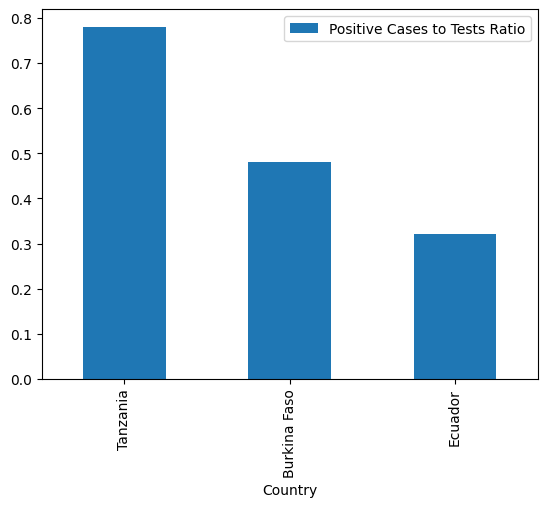

In [25]:
import matplotlib.pyplot as plt

top_countries.plot(x='Country', y='Positive Cases to Tests Ratio', kind='bar')


Display the results in a chart that shows the top ten countries with the most positive cases

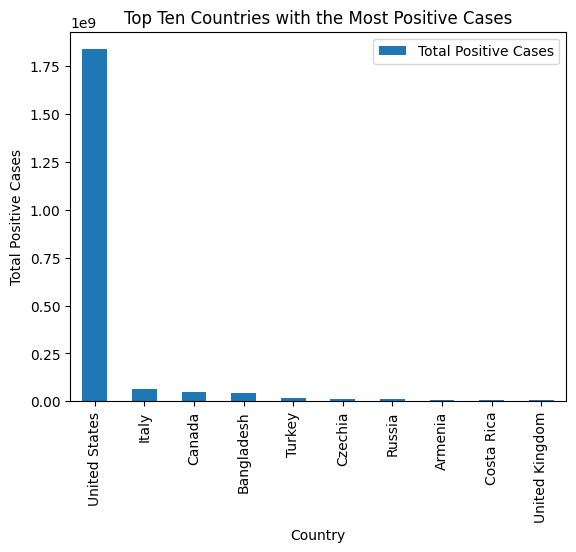

In [29]:
import matplotlib.pyplot as plt

df_total_positive_cases.head(10).plot(x='Country', y='Total Positive Cases', kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Positive Cases')
plt.title('Top Ten Countries with the Most Positive Cases')
plt.show()
